Performed EDA on Data science job salaries and tried to find answers to below questions through my analysis.

1. Which job title earns highest salary ?
2. What is the average salary for each experience level ?
3. What is the average salary for company size Large, Small and Medium ?
4. Does people working full time earns more than contract base employees ?
5. Is salary less for employee woking remotely than who comes to office ?
6. Which country pays more to the employees ?
7. What is the highest earning job in highest paying countries ?
8. What is the highest earning job titles working at expert level ?
9. What is the highest earning job titles working at senioir level ?
10. Has salary of data science job roles increased over the passing years ?
11. What is the trend of salary paid by medium size company over the passing years ?
12. What is the trend of salary paid by large size company over the passing years ?
13. What is the trend of salary paid by medium size company over the passing years ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'ds_salaries.csv'

data = pd.read_csv(filename)

In [3]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['salary_currency'], axis=1, inplace=True)

In [5]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [6]:
print(data.experience_level.unique())
print(data.employment_type.unique())
print(data.company_size.unique())

['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['L' 'S' 'M']


In [7]:
data['experience_level'] = data['experience_level'].map(
    {'EN': 'Entry-level', 'MI': 'Middle-level', 'SE': 'Senior-level', 'EX': 'Executive-level'})

data['employment_type'] = data['employment_type'].map(
    {'FT': 'Full-time', 'CT': 'Contract', 'PT': 'Part-time', 'FL': 'Freelance'})

data['company_size'] = data['company_size'].map(
    {'L': 'Large', 'S': 'Small', 'M': 'Medium'})


In [8]:
print(data.experience_level.unique())
print(data.employment_type.unique())
print(data.company_size.unique())

['Middle-level' 'Senior-level' 'Entry-level' 'Executive-level']
['Full-time' 'Contract' 'Part-time' 'Freelance']
['Large' 'Small' 'Medium']


In [9]:
data['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

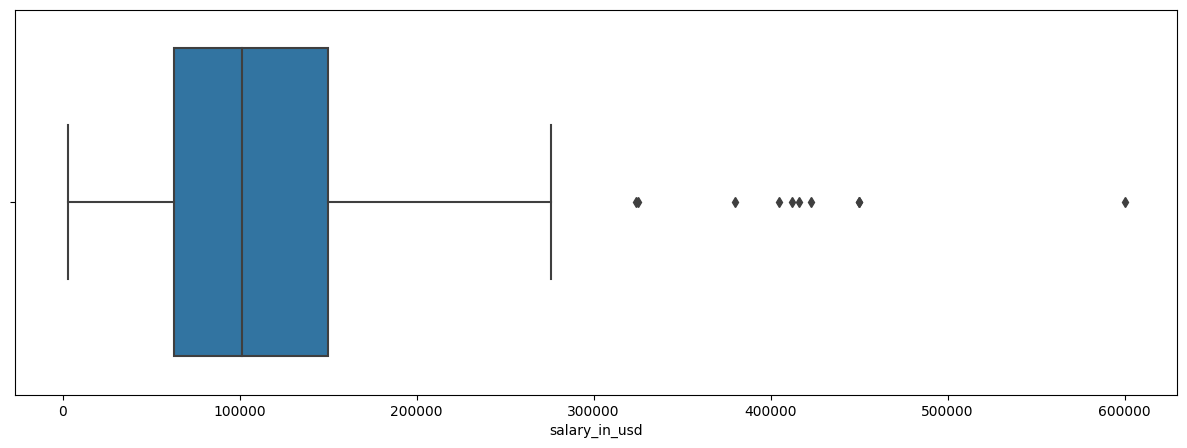

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='salary_in_usd')
plt.show()

In [11]:
data = data[~(data['salary_in_usd'] > 300000)]

In [12]:
def count_plot(feature):
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=feature)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))
    plt.xticks(rotation=90)
    plt.show()


In [13]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

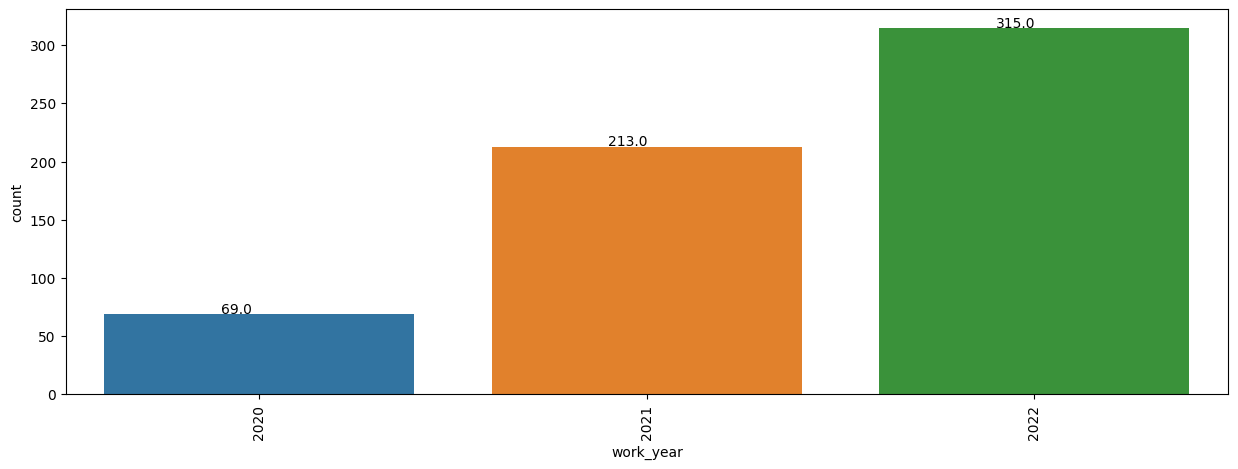

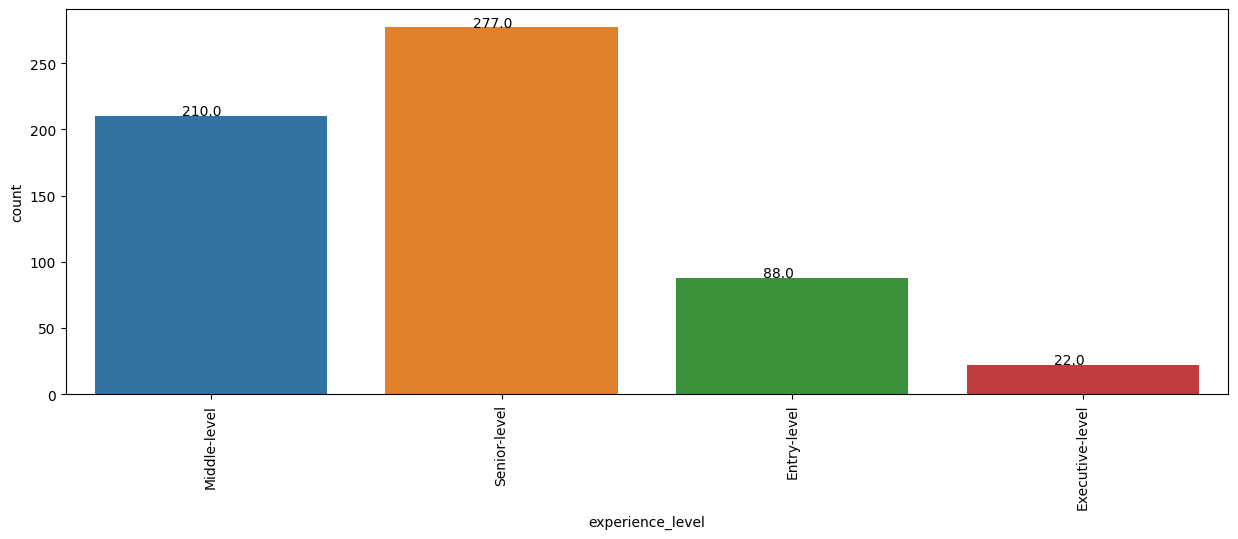

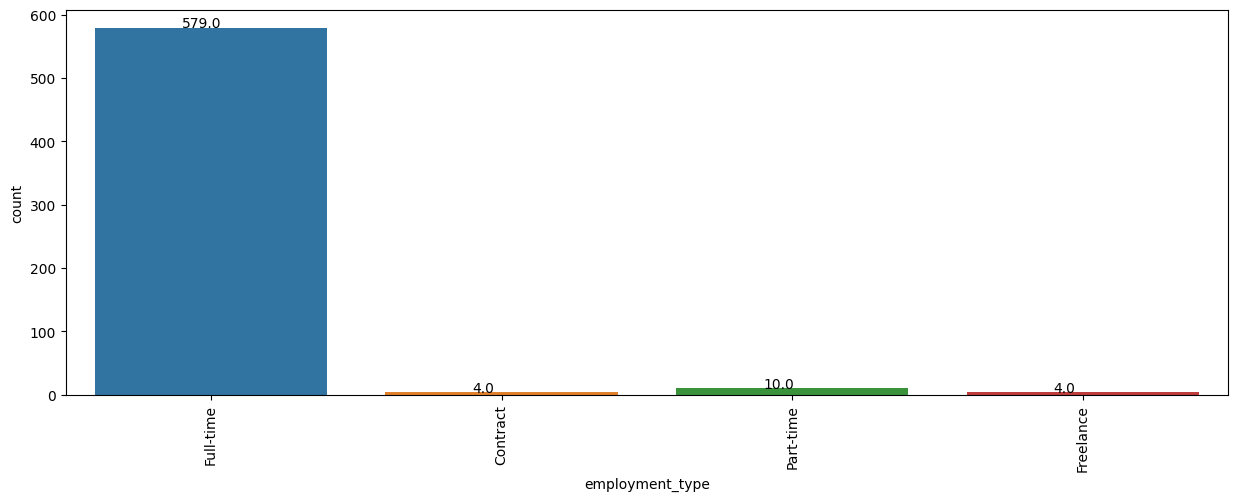

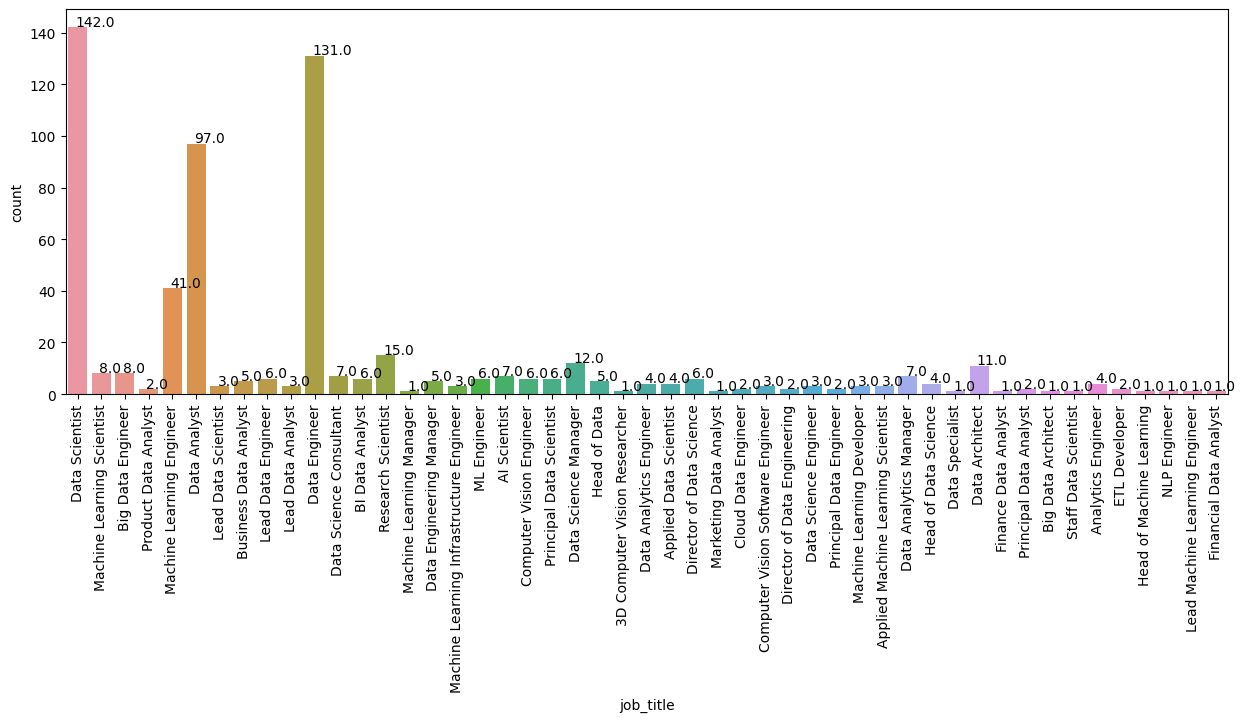

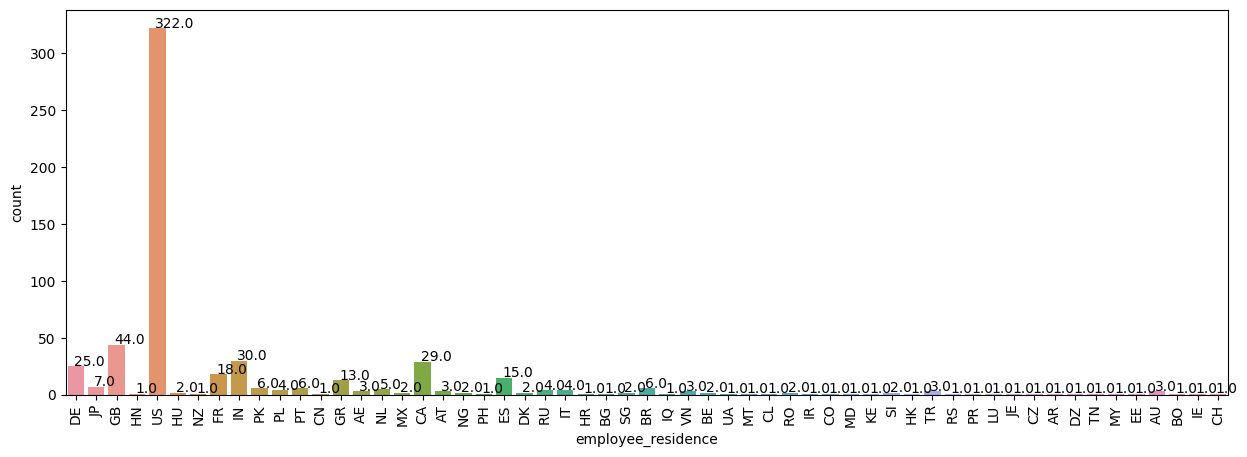

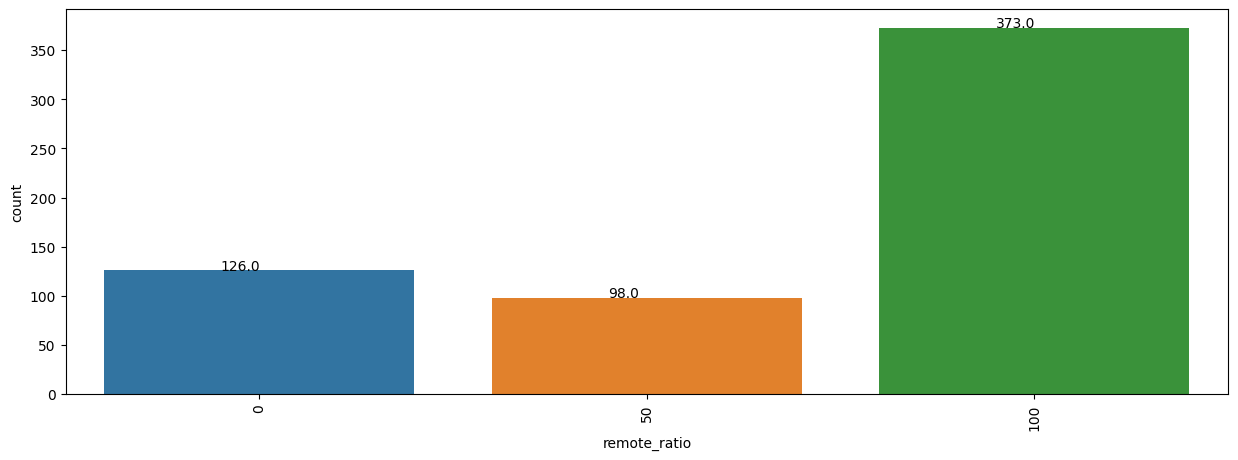

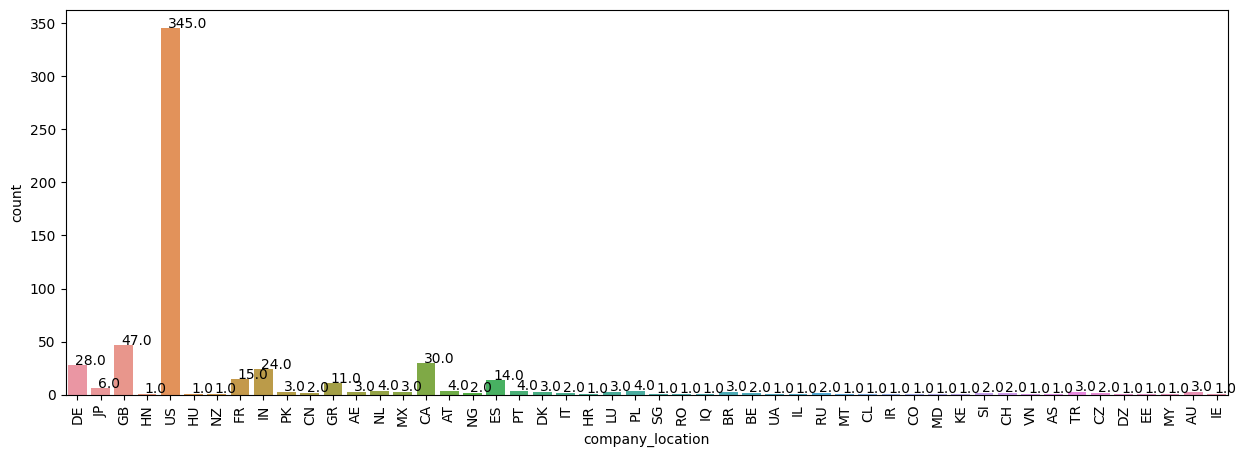

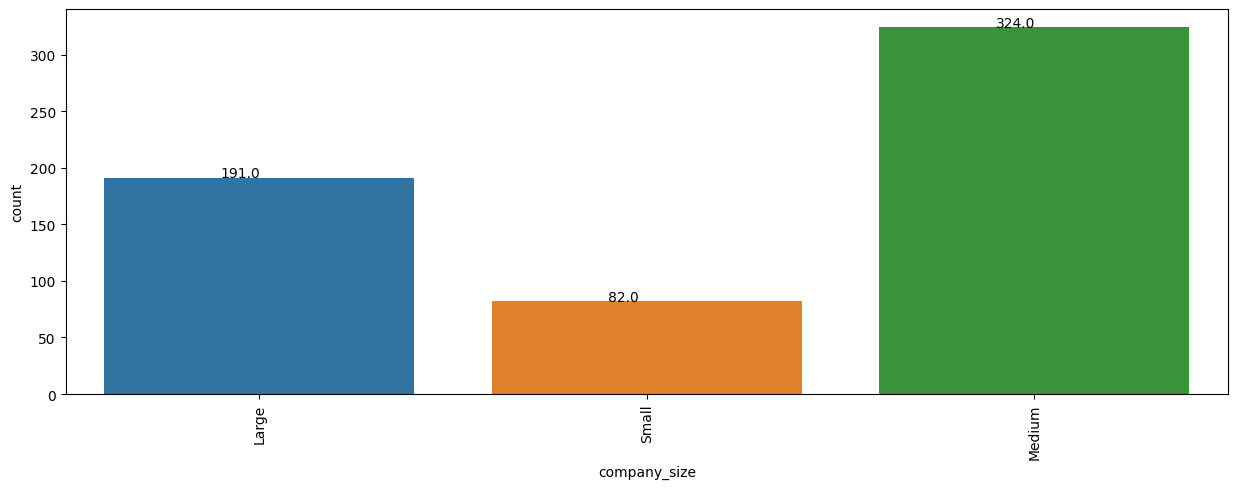

In [14]:
columns = ['work_year', 'experience_level', 'employment_type', 'job_title',
           'employee_residence', 'remote_ratio', 'company_location', 'company_size']

for i in columns:
    count_plot(i)


In [15]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

# 1. Highest Salary for each job

In [16]:
# Function to plot bar plot
def bar_plot(feature,data,title):
    data = data.groupby(feature)['salary_in_usd'].mean()
    plt.figure(figsize=(12,16))
    ax = sns.barplot(x=data.values, y=data.index,color='pink')
    for i, v in enumerate(data.values):
        ax.annotate(str(v), xy=(v,i), va='center')
    ax.set_xlabel("salary")
    ax.set_ylabel(feature)
    ax.set_title(title)
    plt.show()

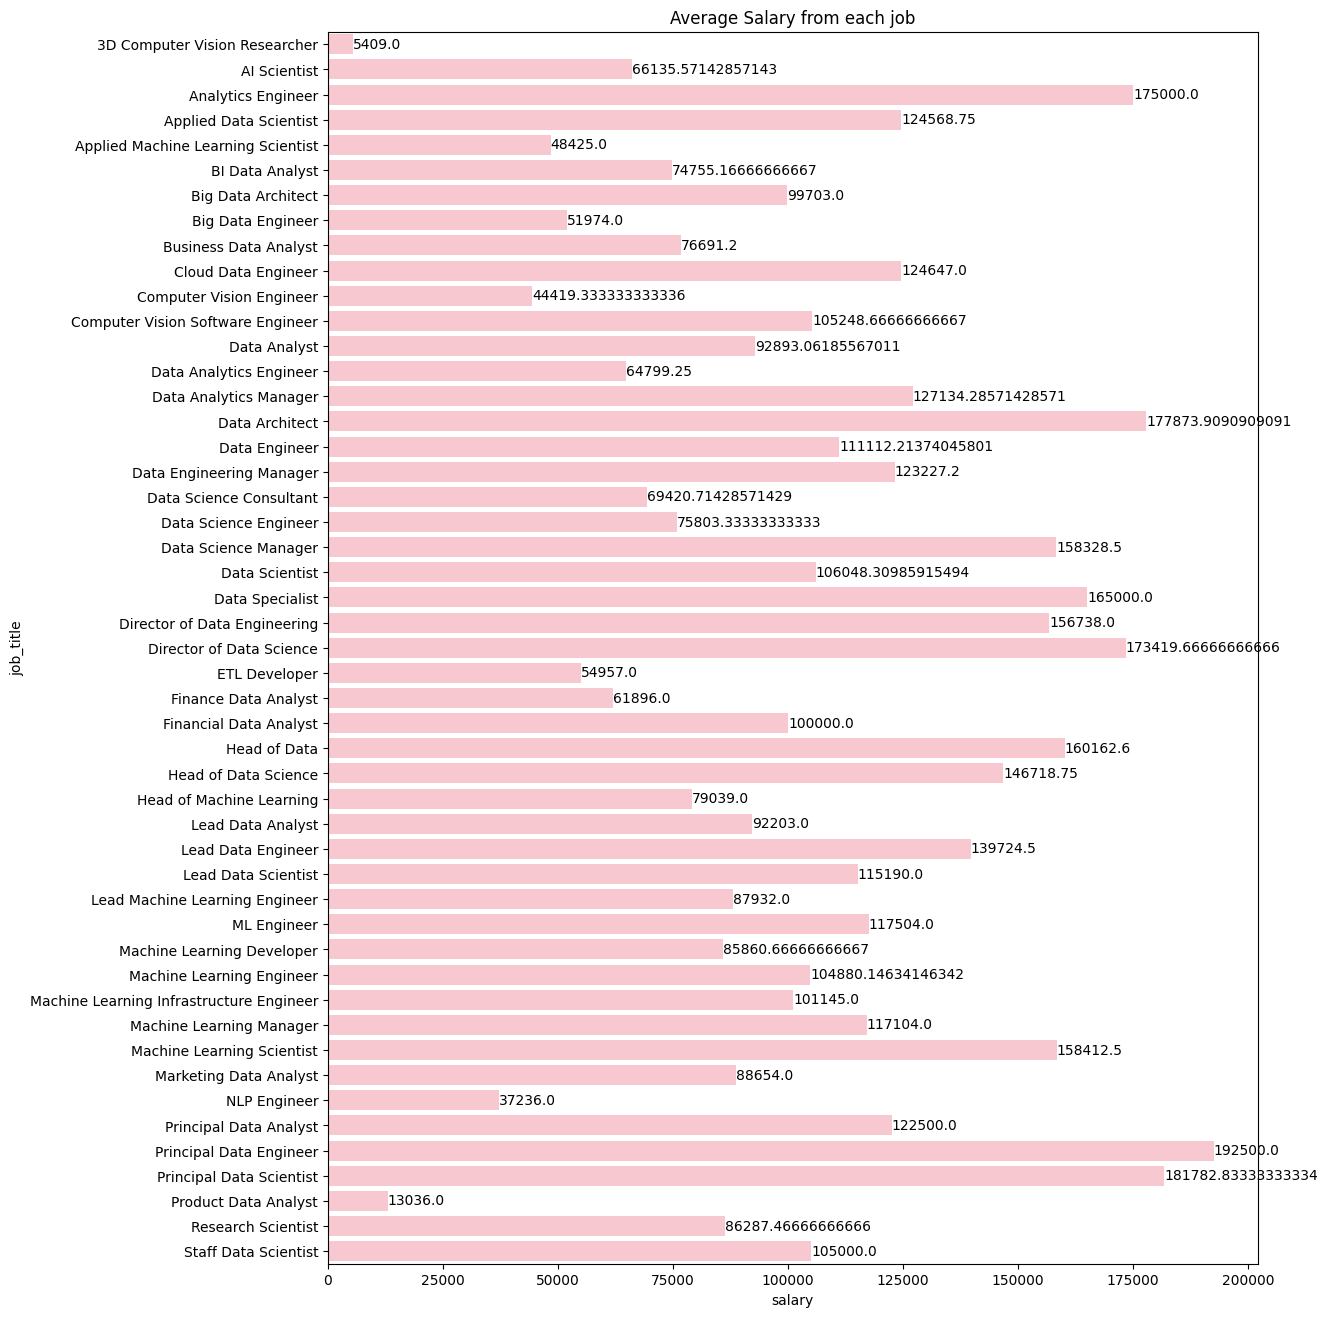

In [17]:
bar_plot('job_title', data, 'Average Salary from each job')

# What is the average salary for each experience level ?

In [18]:
# Function to plot box plot
def box_plot(x,y,data,title):
    plt.figure(figsize=(10,8))
    sals_mean = data.groupby([x])[y].mean();
    
    #print(sals)
    ax = sns.boxplot(data=data,y=y,x = x)
    
    vertical_offset_mean = data[y].median() * 0.05 # offset from median for display
    vertical_offset_max = data[y].max() * 0.05
    
    for i,xtick in enumerate(ax.get_xticklabels(which='major')):
        #print(xtick.get_text())
        ax.text(i,sals_mean[xtick.get_text()] + vertical_offset_mean,sals_mean[xtick.get_text()], 
             horizontalalignment='center',size='small',color='w',weight='semibold')
    ax.set_title(title)    
    plt.show()

# 2. What is the average salary for each experience level ?

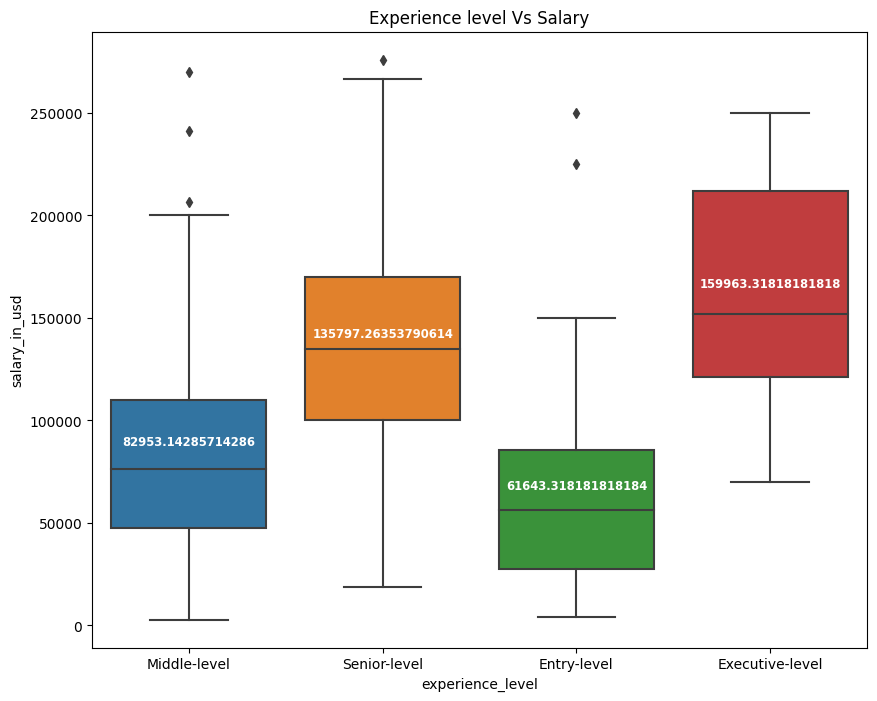

In [19]:
#### Average salary for each experience level.
box_plot('experience_level','salary_in_usd',data,"Experience level Vs Salary")

# 3. What is the average salary for company size Large, Small and Medium ?

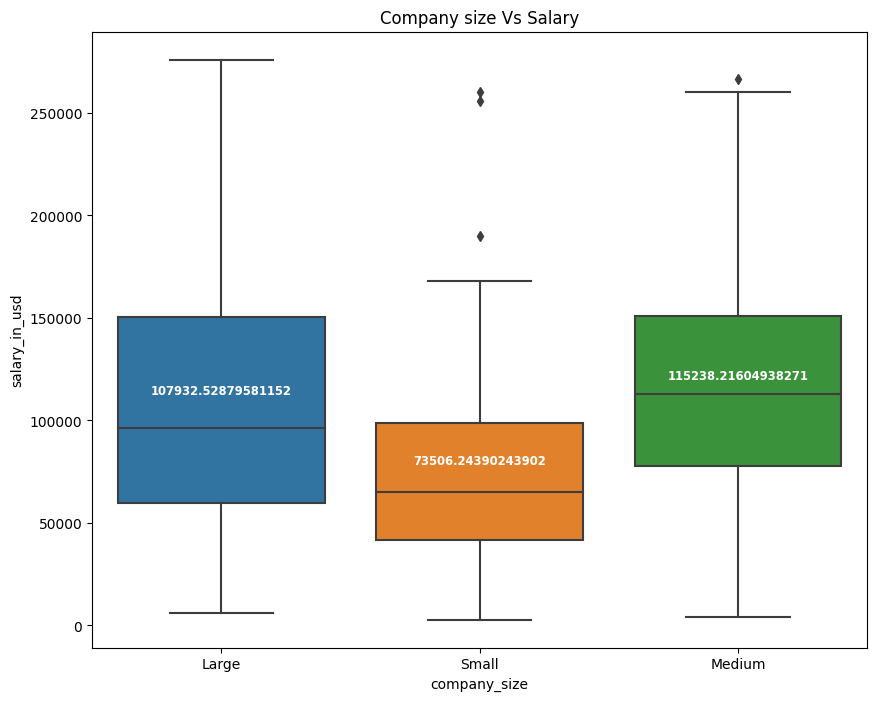

In [20]:
box_plot('company_size','salary_in_usd',data, 'Company size Vs Salary' )

# 4. Does people working full time earns more than contract base employees ?

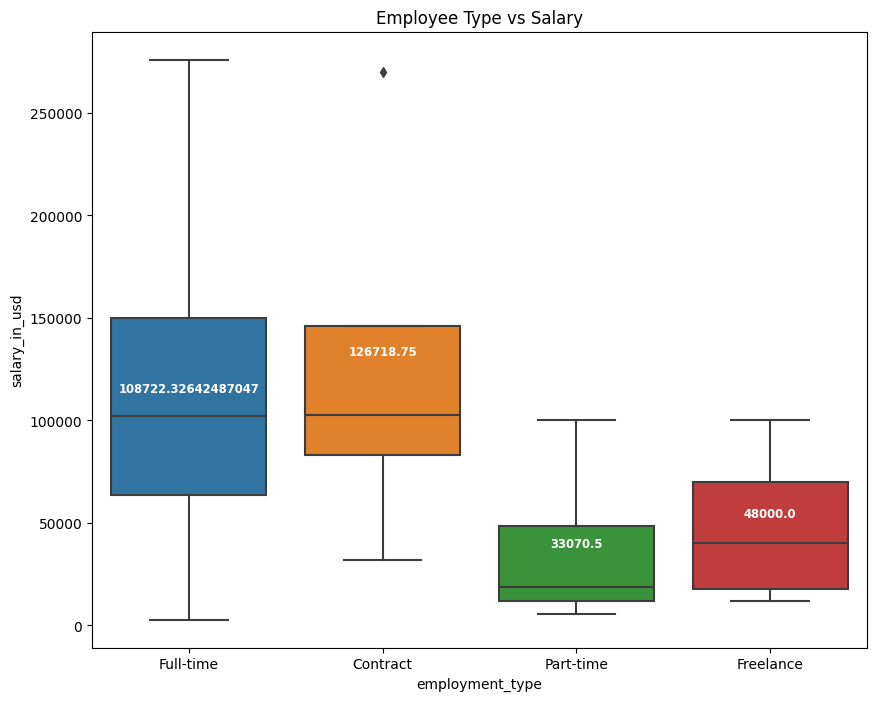

In [21]:
box_plot('employment_type', 'salary_in_usd',data, 'Employee Type vs Salary')

# 5. Is salary less for employee woking remotely than who comes to office ?

In [22]:
data['remote_ratio'] = data['remote_ratio'].map({0 : 'No Remote', 50 : 'Partially Remote', 100 : 'Full Remote'})

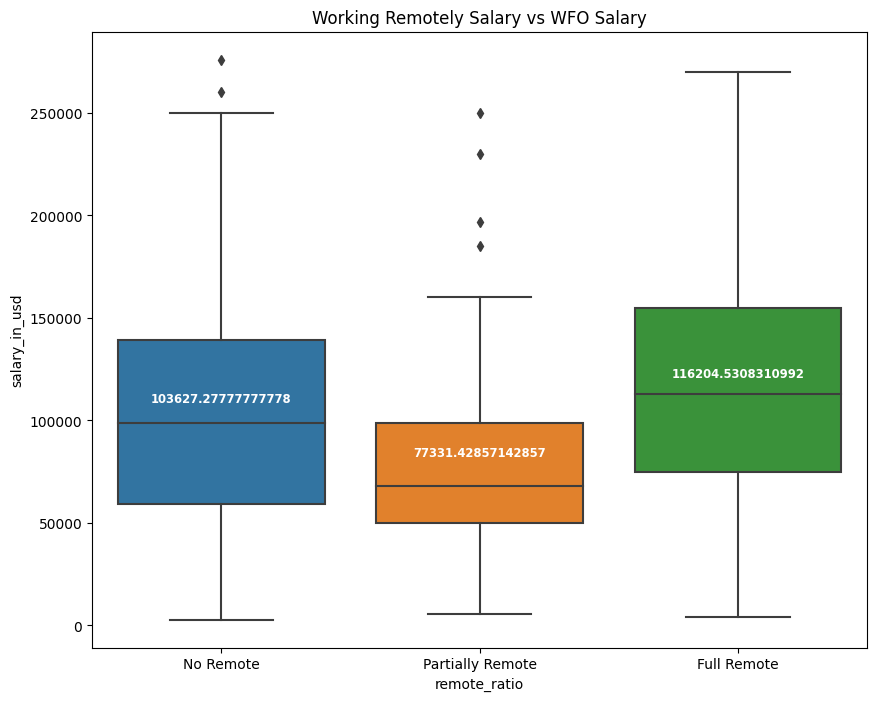

In [23]:
box_plot('remote_ratio', 'salary_in_usd', data, 'Working Remotely Salary vs WFO Salary')

# 6. Which Country pays more to the employee?

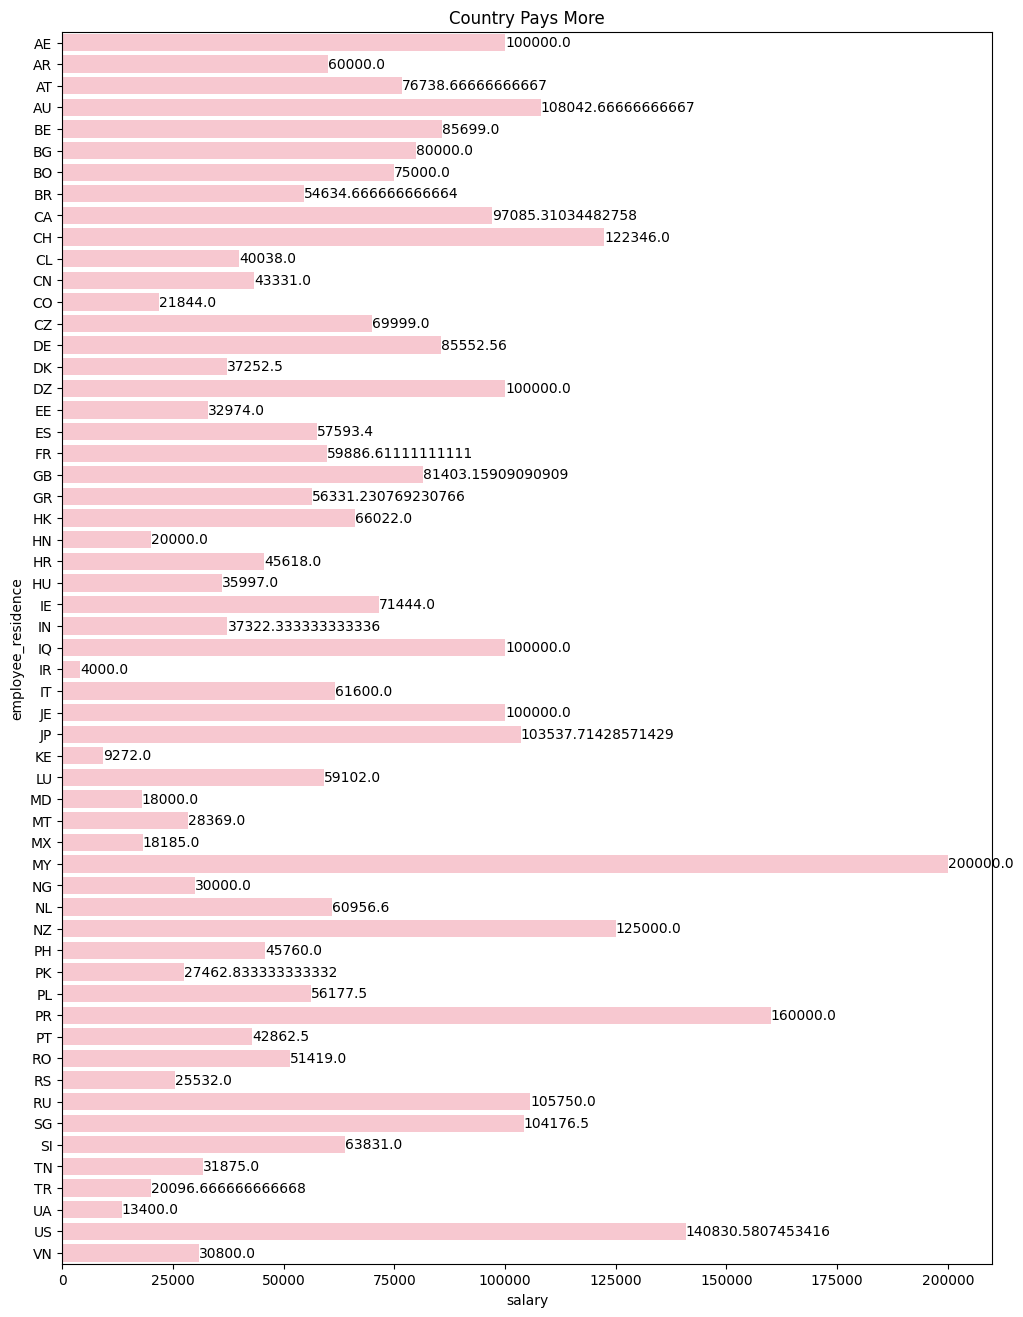

In [24]:
bar_plot('employee_residence', data, 'Country Pays More')

# 7. What is the highest earnings job in highest paying countries

In [25]:
data_ru = data[data['company_location'] == 'RU']
data_us = data[data['company_location'] == 'US']

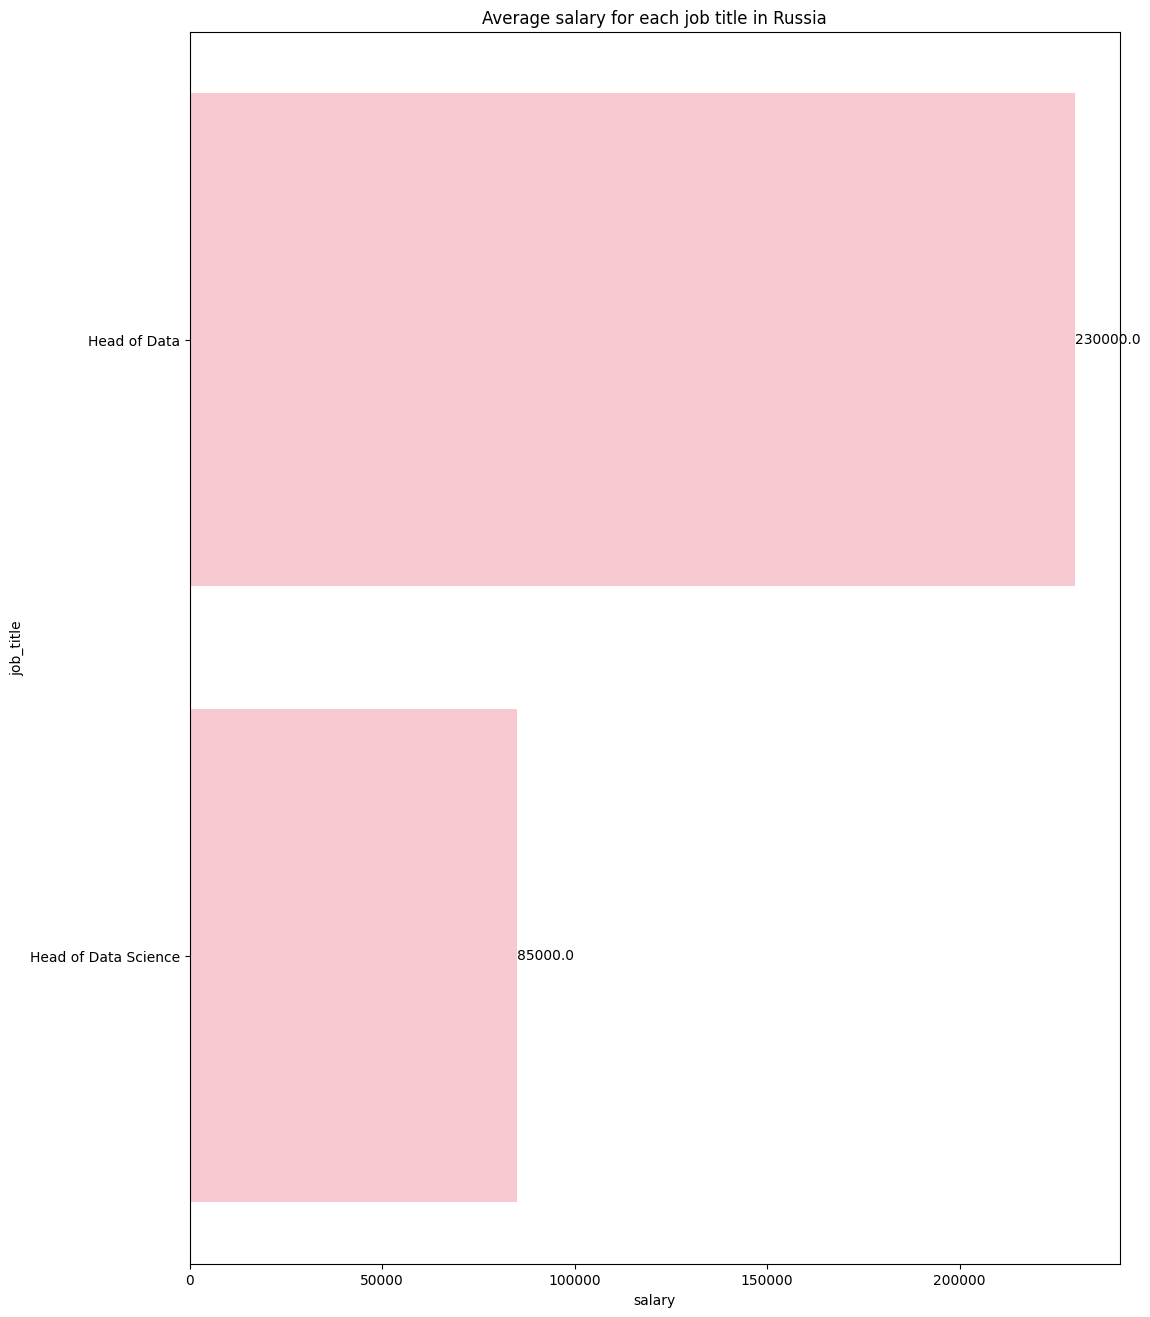

In [26]:
bar_plot('job_title', data_ru, 'Average salary for each job title in Russia')

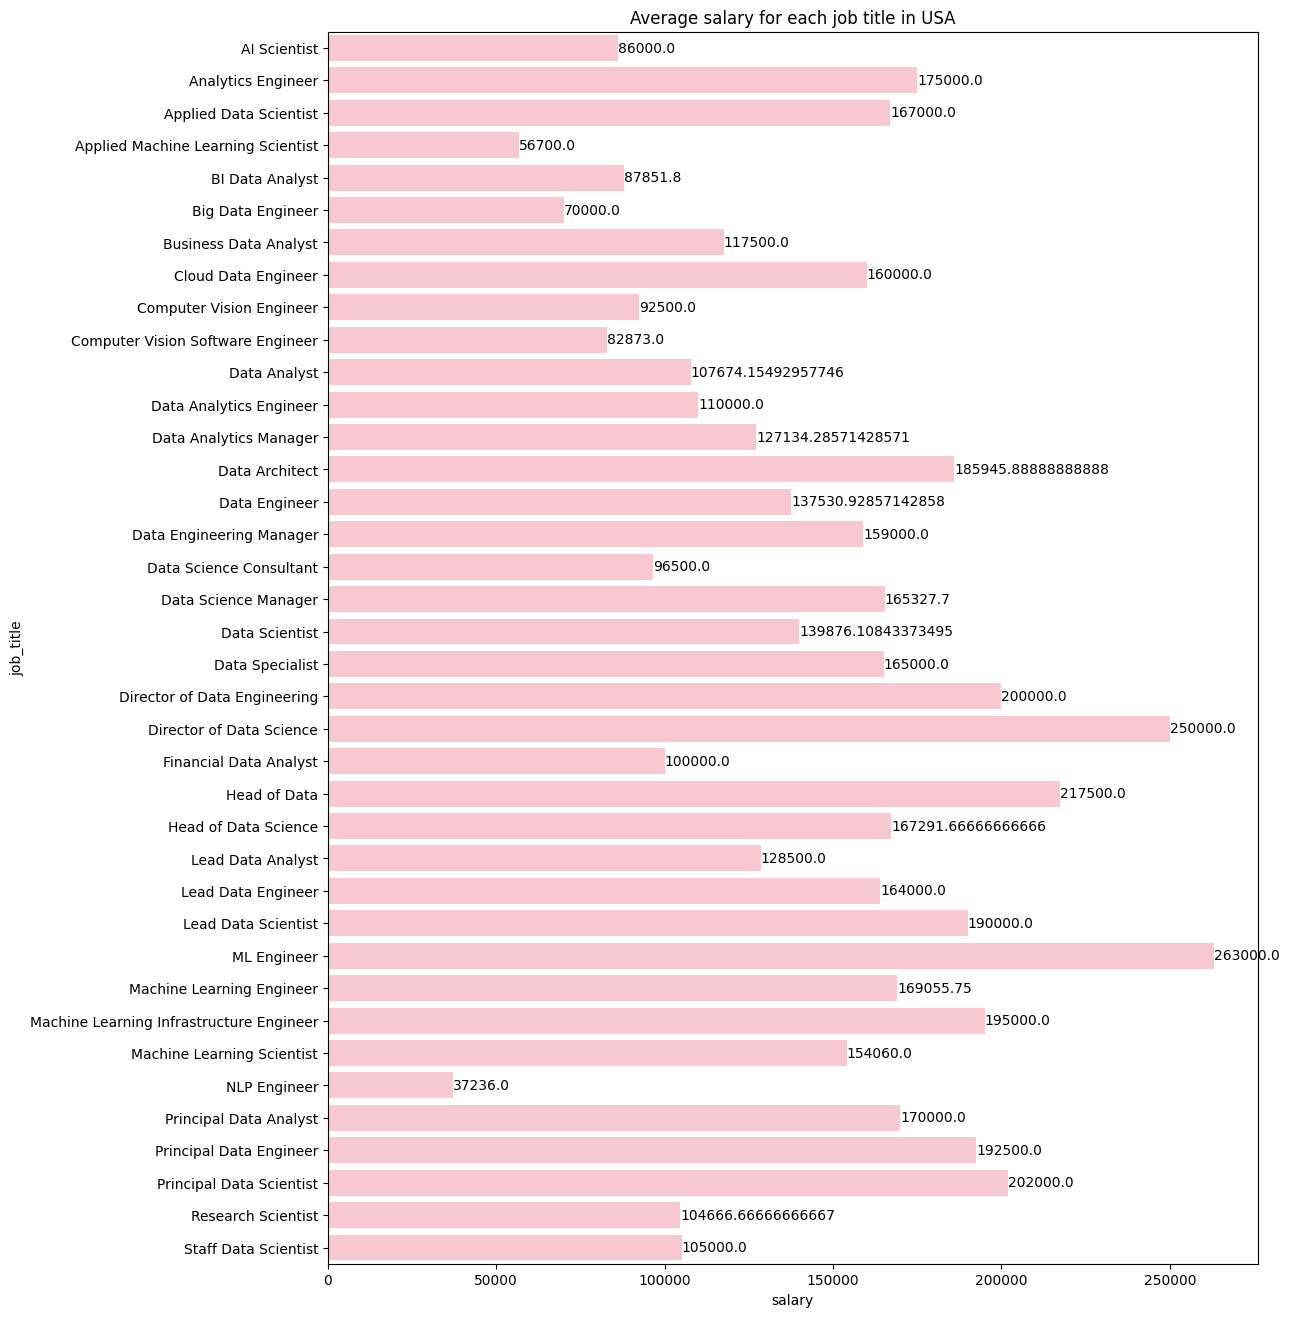

In [27]:
bar_plot('job_title', data_us, 'Average salary for each job title in USA')

# 8. What is average salary working at Expert

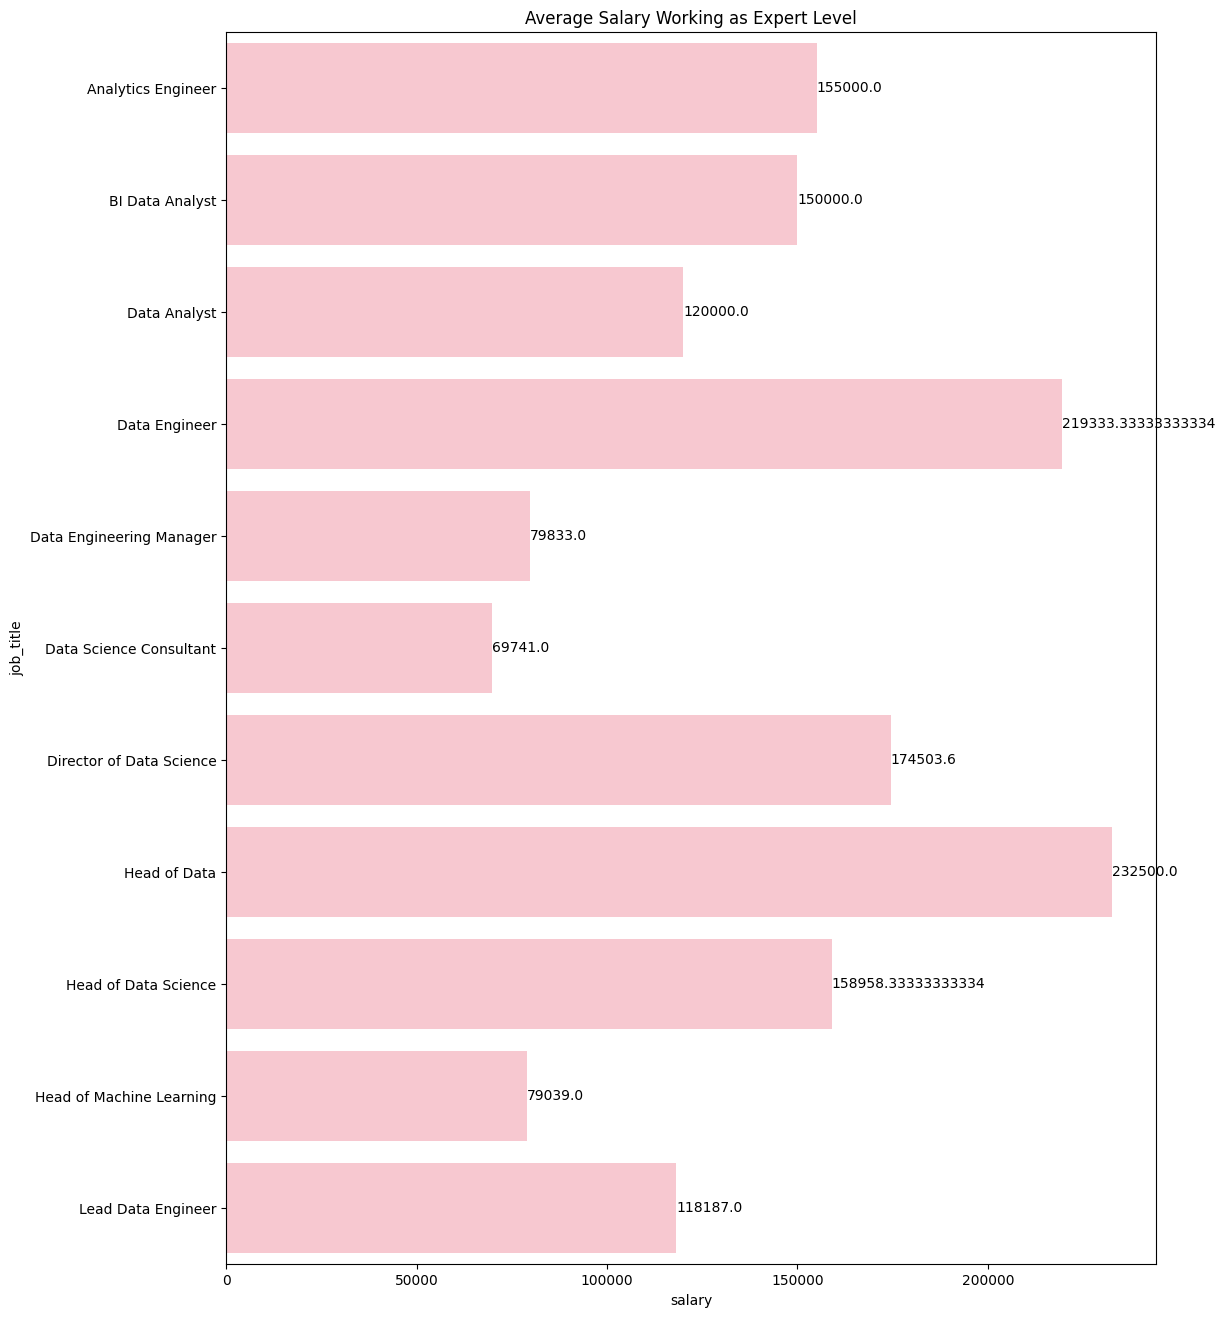

In [36]:
# Get the data for expert level roles
data_expert = data[data['experience_level']=='Executive-level']
bar_plot('job_title', data_expert, 'Average Salary Working as Expert Level')

# 9. What is the Highest earning job titles in Senior Level?

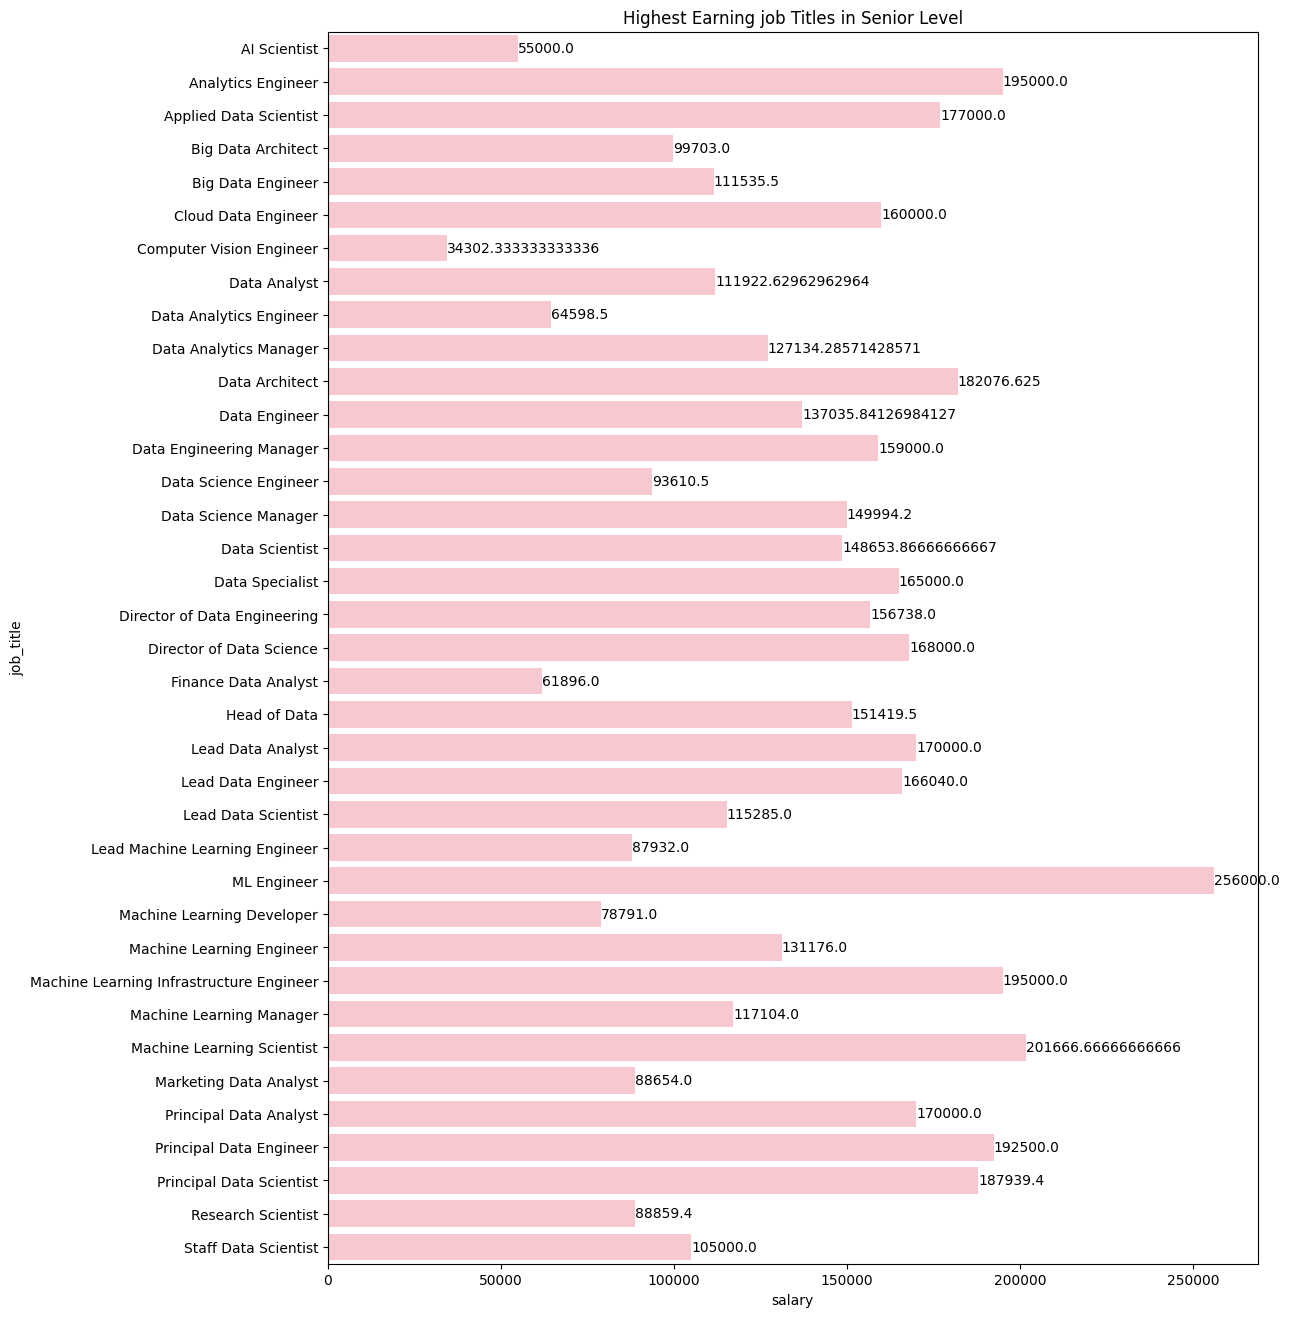

In [34]:
data_senior = data[data['experience_level'] == 'Senior-level']

bar_plot('job_title', data_senior, 'Highest Earning job Titles in Senior Level')

# 10. Has salary of data science job roles increased over the passing years ?

In [51]:
data_year = data.groupby('work_year')['salary_in_usd'].mean()

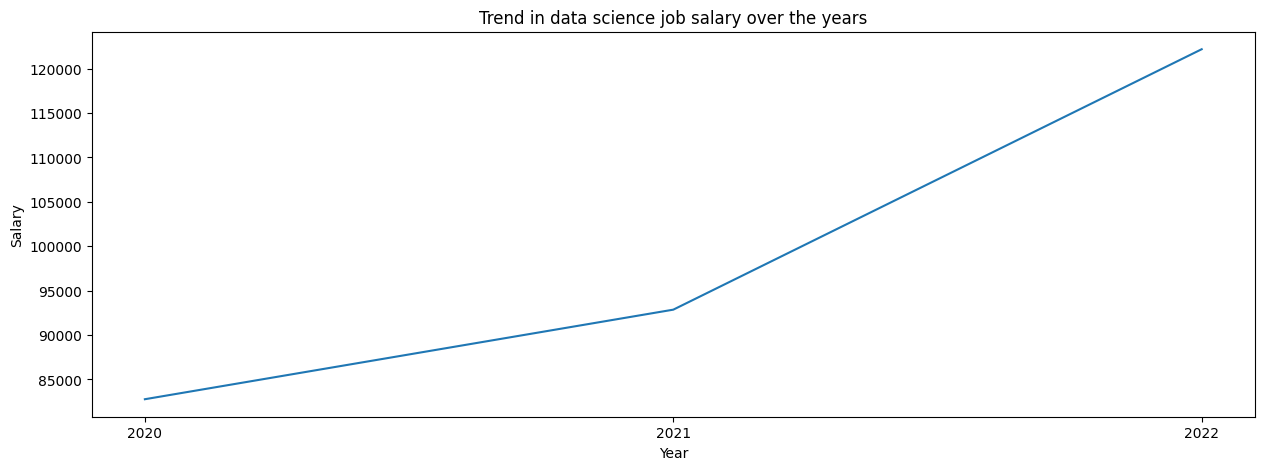

In [52]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x = data_year.index, y= data_year.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in data science job salary over the years')
plt.show()


# 11. What is the trend of salary paid by medium size company over the passing years ?

In [62]:
data_medium = data[data['company_size'] == 'Medium']
data_m = data_medium.groupby('work_year')['salary_in_usd'].mean()

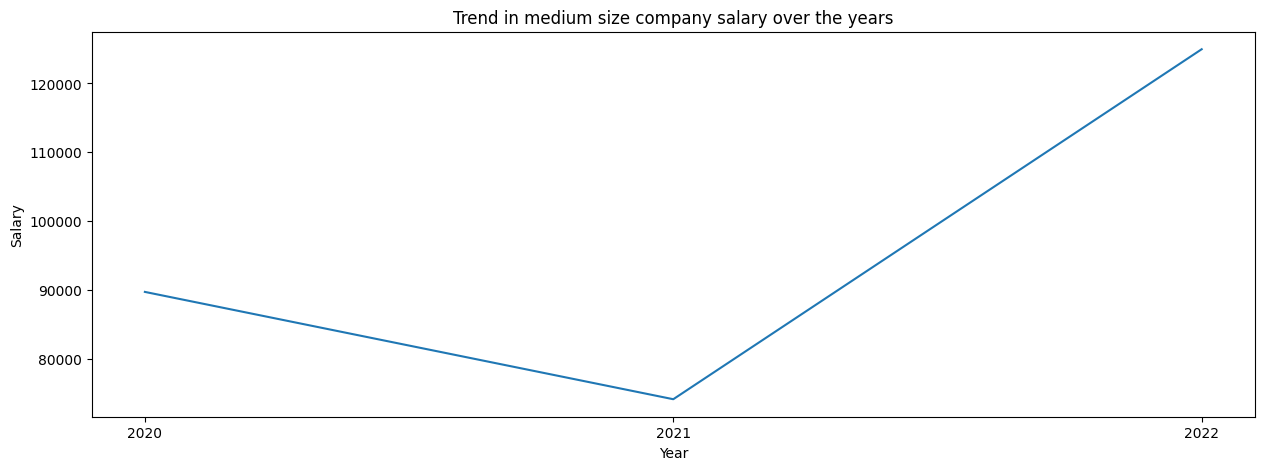

In [63]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x = data_m.index, y= data_m.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in medium size company salary over the years')
plt.show()


# 12. What is the trend of salary paid by large size company over the passing years ?

In [64]:
data_large = data[data['company_size'] == 'Large']
data_l = data_large.groupby('work_year')['salary_in_usd'].mean()

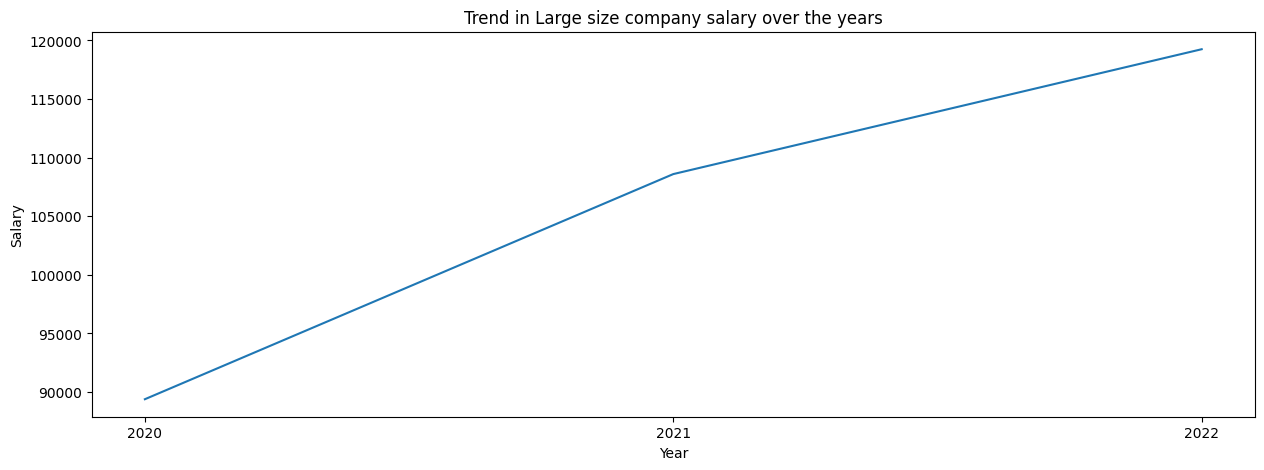

In [66]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x = data_l.index, y= data_l.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in Large size company salary over the years')
plt.show()


# 13. What is the trend of salary paid by small size company over the passing years ?

In [67]:
data_small = data[data['company_size'] == 'Small']
data_s = data_small.groupby('work_year')['salary_in_usd'].mean()

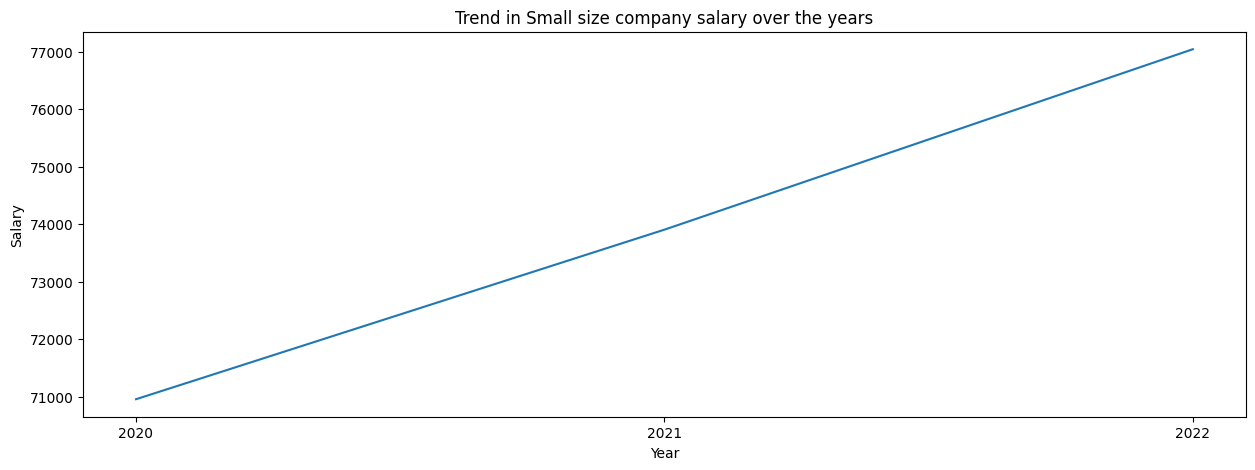

In [68]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x = data_s.index, y= data_s.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in Small size company salary over the years')
plt.show()
